In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

from subprocess import check_output
#print(check_output(["store.csv", "../input"]).decode("utf8"))
sales = pd.read_csv(r'C:\Users\HP\Downloads\New folder\store.csv') # load the dataset
# Any results you write to the current directory are saved as output.

**Explore and analyse data to extract valuable insights of the data **

In [5]:
sales[:5]

,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,West
1,Vijay,Jet,2,39.30,North
2,Mala,Beacon,3,74.25,West
3,Suman,Alpen,3,100.98,North
4,Rachna,Orbit,2,44.98,North


In [6]:
sales.shape # There are 10000 rows and 5 columns

(10000, 5)

In [7]:
sales.describe() # Describe shows a quick statistic summary of your data

,qty,revenue
count,10000.000000,10000.000000
mean,3.387400,90.570221
std,4.318308,127.803928
min,1.000000,18.430000
25%,2.000000,39.300000
50%,2.000000,58.425000
75%,3.000000,75.000000
max,25.000000,1998.750000


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   reps     10000 non-null  object 
 1   product  10000 non-null  object 
 2   qty      10000 non-null  int64  
 3   revenue  10000 non-null  float64
 4   region   10000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB


In [9]:
sales['reps'].unique() 

array(['Chitra', 'Vijay', 'Mala', 'Suman', 'Rachna', 'Aash', 'Chand',
       'Suraj', 'Bala', 'Seet', 'Ravi', 'Anusha', 'Ananya', 'Jaggi',
       'Reva', 'Meena', 'Sai', 'Rahul', 'Ram', 'Prarth', 'Pooja', 'Rishi',
       'Ranga', 'Sesh', 'Shaanth', 'Bharath', 'Susan', 'Ratna', 'Easwar',
       'Prasad', 'Madhu', 'Suresh', 'Anahit', 'Sumedh', 'Manju',
       'Nandini', 'Santosh', 'Satyen', 'Vaghya', 'Palak', 'Aparna',
       'Jagdish', 'Vish', 'Kumar', 'John', 'Bhat', 'Hussain', 'Alka',
       'Rohini', 'Keshab', 'Nidhi', 'Satya', 'Venkat', 'Veeyes', 'Rajat',
       'Chandra', 'Kamat', 'Raji', 'Swami', 'Jay', 'Mukund', 'Priya',
       'Kishen', 'Vidya', 'Akila', 'Durga', 'Mak', 'Mehta', 'Javed',
       'Sruti', 'Mukesh', 'Kishore'], dtype=object)

In [10]:
sales['region'].unique()

array(['West', 'North', 'East', 'South'], dtype=object)

In [11]:
print(sales.qty.max())
print(sales.qty.min())

25
1


In [12]:
print(sales.revenue.max())
print(sales.revenue.min())

1998.75
18.43


In [13]:
# Count of transactions made by each rep
pd.value_counts(sales.reps, sort=True)

Seet       353
Rachna     318
Santosh    318
Aash       315
Vish       308
          ... 
Jay         84
Ram         84
Anusha      82
Sesh        81
Rohini      79
Name: reps, Length: 72, dtype: int64

In [14]:
# Get a summary of sales made by a particular rep called Seet
gb = sales.groupby(['reps'])
gb.get_group('Seet').head(10)

,reps,product,qty,revenue,region
10,Seet,Alpen,2,67.32,South
14,Seet,Jet,1,19.95,South
19,Seet,Orbit,3,67.13,South
38,Seet,Jet,3,59.25,South
81,Seet,Jet,20,399.00,South
99,Seet,Orbit,3,67.82,South
169,Seet,Alpen,2,68.00,South
171,Seet,Milka,2,45.21,South
365,Seet,Almond,1,25.00,South
368,Seet,Milka,3,67.82,South


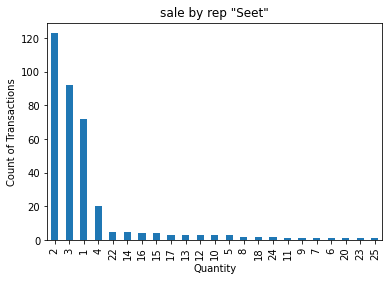

In [15]:
seet = gb.get_group('Seet').qty
seet.value_counts().plot(kind='bar')
plt.xlabel('Quantity')
plt.ylabel('Count of Transactions')
plt.title('sale by rep "Seet"');

We want to see the revenue and quantity broken down by the products,and region... we would like to use pivot table.

In this case, the company management wants to understand sales in more details:
- How much revenue is the reps generating in their respective regions?
- What products are fast moving in terms of the quantity and revenue generated?
- Who sells what products at what quantity in which region?


In [16]:
# the pivot table is used here to start aggregating the data and summarizing it by grouping the reps with their region. 
pd.pivot_table(sales,index=["region","reps","product"],aggfunc=np.sum)[:12]

qty  revenue
region reps product              
East   Aash Almond   102  2535.02
            Alpen    186  6217.75
            Beacon    48  1190.76
            Galaxy    30  2378.10
            Halls     17   319.11
            Jet      145  2861.58
            Mars     173  4012.66
            Milka    127  2876.64
            Orbit    103  2323.66
            Prince    82  2221.74
            Star      62  1288.15
            Trident   60  1773.30

In [17]:
total_rev = sales.groupby('region')['revenue'].apply(lambda x: x.sum())
total_rev.sort_values(ascending=False)

region
North    326109.54
West     274631.29
South    158819.85
East     146141.53
Name: revenue, dtype: float64

In [18]:
df_w = sales[sales['region'] == 'West']  
sales_west = df_w.groupby('reps')['revenue'].apply(lambda x: x.sum())

df_e = sales[sales['region'] == 'East']   
sales_east = df_e.groupby('reps')['revenue'].apply(lambda x: x.sum())

df_n = sales[sales['region'] == 'North']   
sales_north = df_n.groupby('reps')['revenue'].apply(lambda x: x.sum())

df_s = sales[sales['region'] == 'South']   
sales_south = df_s.groupby('reps')['revenue'].apply(lambda x: x.sum())

total_rev_rep = sales.groupby('reps')['revenue' ].apply(lambda x: x.sum())
total_rev_rep [:5]  # total revenue generated by each rep

reps
Aash      29998.47
Akila      7495.80
Alka      11464.96
Anahit     7376.05
Ananya    18510.93
Name: revenue, dtype: float64

In [19]:
sales_west # revenues generated by reps in the western region

reps
Akila       7495.80
Anahit      7376.05
Bala       10182.97
Chandra     9016.93
Chitra      8506.26
Easwar     13949.79
Jagdish    23634.13
Jaggi       6675.63
John       12190.87
Mak        11491.63
Mala       18600.60
Manju       7863.62
Meena       8833.00
Mehta      13325.86
Mukesh      7796.19
Palak      10822.27
Priya      11710.00
Reva        7442.66
Santosh    29801.71
Sumedh     11994.84
Suraj       9042.19
Suresh     17823.44
Vidya       9054.85
Name: revenue, dtype: float64

****Count or the number of transactions carried out by each rep****

In [20]:
total_tr = sales.groupby('reps')['revenue' ].apply(lambda x: x.count())
total_tr[:5]

reps
Aash      315
Akila     109
Alka      116
Anahit    104
Ananya    216
Name: revenue, dtype: int64

In [21]:
sales.reps.unique().size  # Get a count of uniques values of reps

72

There are 72 reps working with the company

In [22]:
total_rev_rep.sum()

905702.21

Total revenue generated by all the reps for the company is Rs. 9,05,702.21 covering 12 brands involving 10,000 transactions in all the 4 regions

**** What are count of transactions for each product ?****

In [23]:
product_tr = sales.groupby('product')['qty'].apply(lambda x: x.count())
product_tr.sort_values(ascending=False)

product
Alpen      1588
Milka      1294
Jet        1274
Orbit      1255
Almond     1015
Trident     659
Star        652
Beacon      651
Mars        638
Galaxy      342
Prince      325
Halls       307
Name: qty, dtype: int64

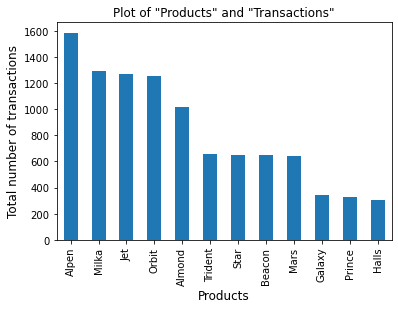

In [24]:
sales.groupby(['product']).qty.count().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Total number of transactions', fontsize=12)
plt.title('Plot of "Products" and "Transactions"');

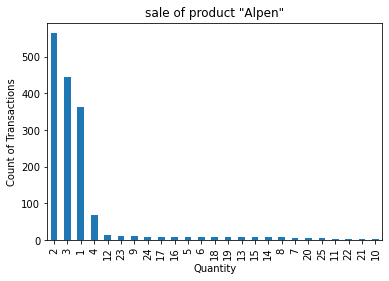

In [25]:
dk = sales.groupby(['product'])
dk1 = dk.get_group('Alpen').qty.value_counts()
dk1.plot(kind='bar')

plt.xlabel('Quantity')
plt.ylabel('Count of Transactions')
plt.title('sale of product "Alpen"');

****What is the total quantity sold for each product ?****

In [26]:
product_sum = sales.groupby('product')['qty'].apply(lambda x: x.sum())
product_sum.sort_values(ascending=False)

product
Alpen      5267
Orbit      4375
Jet        4262
Milka      4153
Almond     3258
Mars       2498
Trident    2436
Beacon     2152
Star       2101
Prince     1253
Galaxy     1150
Halls       969
Name: qty, dtype: int64

In [27]:
product_sum.sum()

33874

A total of 33874 units were sold

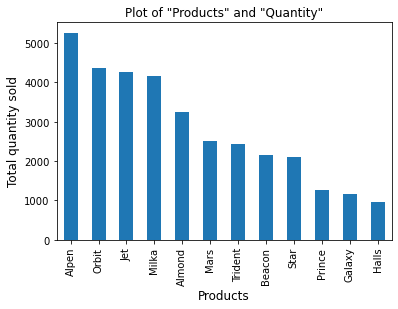

In [28]:
sales.groupby(['product']).qty.sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Total quantity sold', fontsize=12)
plt.title('Plot of "Products" and "Quantity"');

****Summary of Revenue generated by reps in each region****

In [29]:
print('Number of Reps - South region:', sales_south.size, 'Revenue generated is:', sales_south.sum())
print('Number of Reps - West region:', sales_west.size,  'Revenue generated is:', sales_west.sum())
print('Number of Reps - North region:', sales_north.size, 'Revenue generated is:', sales_north.sum())
print('Number of Reps - East region:', sales_east.size, 'Revenue generated is:', sales_east.sum())

Number of Reps - South region: 12 Revenue generated is: 158819.84999999998
Number of Reps - West region: 23 Revenue generated is: 274631.29
Number of Reps - North region: 25 Revenue generated is: 326109.54000000004
Number of Reps - East region: 12 Revenue generated is: 146141.53


In [30]:
total_rev = sales.groupby('region')['revenue'].apply(lambda x: x.sum())
total_rev.sort_values(ascending=False)

region
North    326109.54
West     274631.29
South    158819.85
East     146141.53
Name: revenue, dtype: float64

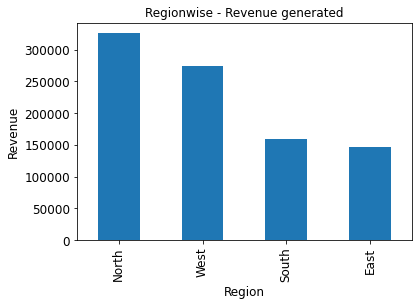

In [31]:
total_rev.sort_values(ascending=False).plot(kind='bar', fontsize=12)
plt.title('Regionwise - Revenue generated')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Revenue', fontsize=12);

****Per Capita Revenue ****

(Average revenue = Total Revenue / No of Sales Reps) 

In [32]:
print('Average Revenue generated in South Region is:', sales_south.mean())
print('Average Revenue generated in West Region is:', sales_west.mean())
print('Average Revenue generated in North region is:', sales_north.mean())
print('Average Revenue generated in East Region is:', sales_east.mean())

Average Revenue generated in South Region is: 13234.987499999997
Average Revenue generated in West Region is: 11940.490869565216
Average Revenue generated in North region is: 13044.3816
Average Revenue generated in East Region is: 12178.460833333333


****Product Segmentation****

In [33]:
df_n = sales[sales['region'] == 'North']   
productsales_north = df_n.groupby('product')['revenue'].apply(lambda x: x.sum())
productsales_north.sort_values(ascending=False)

df_s = sales[sales['region'] == 'South']   
productsales_south = df_s.groupby('product')['revenue'].apply(lambda x: x.sum())
productsales_south.sort_values(ascending=False)

df_w = sales[sales['region'] == 'West']   
productsales_west = df_w.groupby('product')['revenue'].apply(lambda x: x.sum())
productsales_west.sort_values(ascending=False)

df_e = sales[sales['region'] == 'East']   
productsales_east = df_e.groupby('product')['revenue'].apply(lambda x: x.sum())
productsales_east.sort_values(ascending=False)

productsales = sales.groupby('product')['revenue'].apply(lambda x: x.sum())
productsales.sort_values(ascending=False)

df_sales = pd.DataFrame(product_tr)
df_sales.columns = [ 'transactions']
df_sales.reset_index()

df_sales1 = pd.DataFrame(productsales)
df_sales1.reset_index()

product_qty = sales.groupby('product')['qty'].apply(lambda x: x.sum())
df_sales2 = pd.DataFrame(product_qty)

product_tr_rev = pd.concat([df_sales2,df_sales1], axis=1)
product_tr_rev.reset_index(inplace=True)
product_tr_rev[:5]

,product,qty,revenue
0,Almond,3258,80581.91
1,Alpen,5267,177152.07
2,Beacon,2152,53164.41
3,Galaxy,1150,90919.18
4,Halls,969,18211.18


In [34]:
product_qty = pd.concat([df_sales,df_sales1], axis=1)
product_tr_rev['unit_price'] = product_tr_rev.revenue/product_tr_rev.qty
product_tr_rev

,product,qty,revenue,unit_price
0,Almond,3258,80581.91,24.733551
1,Alpen,5267,177152.07,33.634340
2,Beacon,2152,53164.41,24.704651
3,Galaxy,1150,90919.18,79.060157
4,Halls,969,18211.18,18.793787
5,Jet,4262,84077.56,19.727255
6,Mars,2498,58109.60,23.262450
7,Milka,4153,94249.40,22.694293
8,Orbit,4375,99284.25,22.693543
9,Prince,1253,34025.46,27.155196


****What is the Unit Price of each product?****

In [35]:
unit_p = product_tr_rev.groupby('product')['unit_price'].apply(lambda x: x.sum())
unit_p.sort_values(ascending=False)

product
Galaxy     79.060157
Alpen      33.634340
Trident    29.675369
Prince     27.155196
Almond     24.733551
Beacon     24.704651
Mars       23.262450
Milka      22.694293
Orbit      22.693543
Star       20.770105
Jet        19.727255
Halls      18.793787
Name: unit_price, dtype: float64

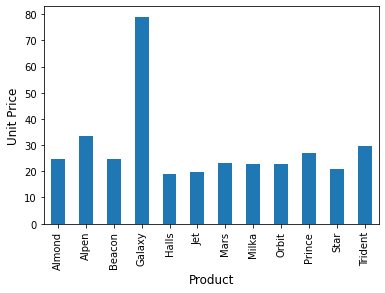

In [36]:
unit_p.plot(kind='bar')
plt.ylabel('Unit Price', fontsize=12)
plt.xlabel('Product', fontsize=12);

Galaxy is the highest priced product and Halls is the lowest priced product.

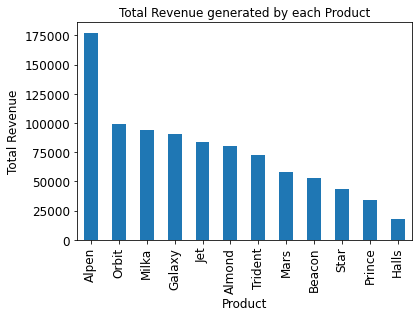

In [37]:
productsales.sort_values(ascending=False).plot(kind='bar', fontsize=12)
plt.title('Total Revenue generated by each Product')
plt.ylabel('Total Revenue', fontsize=12)
plt.xlabel('Product', fontsize=12);

Alpen generated the highest revenue and Halls the lowest.

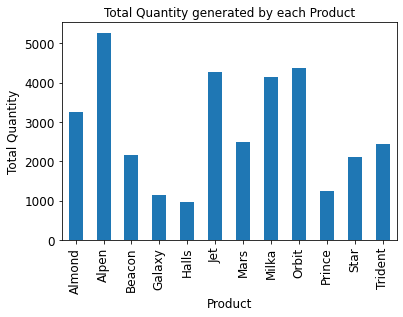

In [38]:
qty_p = product_tr_rev.groupby('product')['qty'].apply(lambda x: x.sum())
qty_p.plot(kind='bar', fontsize=12)
plt.title('Total Quantity generated by each Product')
plt.ylabel('Total Quantity', fontsize=12)
plt.xlabel('Product', fontsize=12);

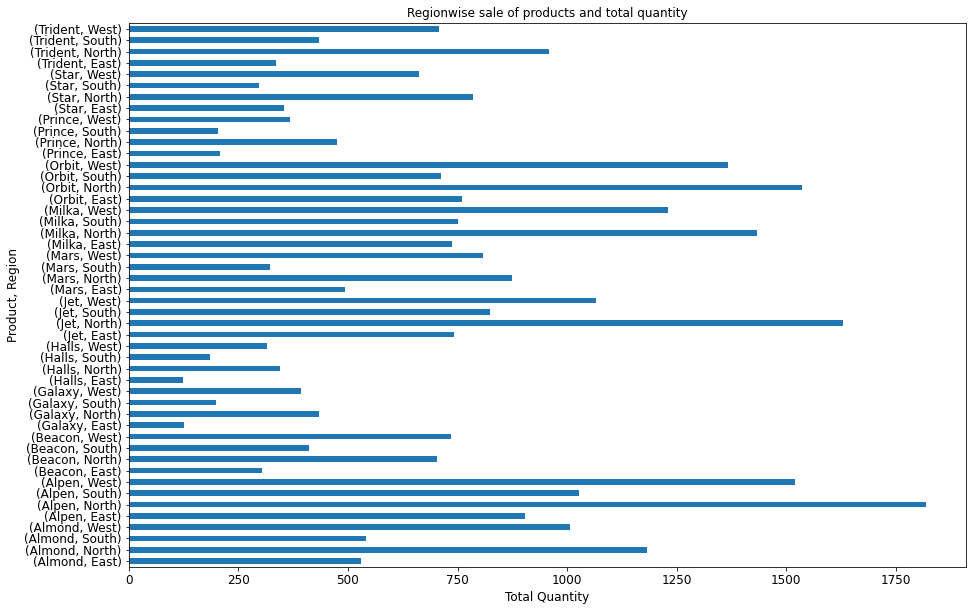

In [39]:
region_p = sales.groupby(['product', 'region'])['qty'].apply(lambda x: x.sum())
region_p.plot(kind='barh', fontsize=12,figsize=(15,10) )
plt.title('Regionwise sale of products and total quantity')
plt.ylabel('Product, Region', fontsize=12)
plt.xlabel('Total Quantity', fontsize=12);

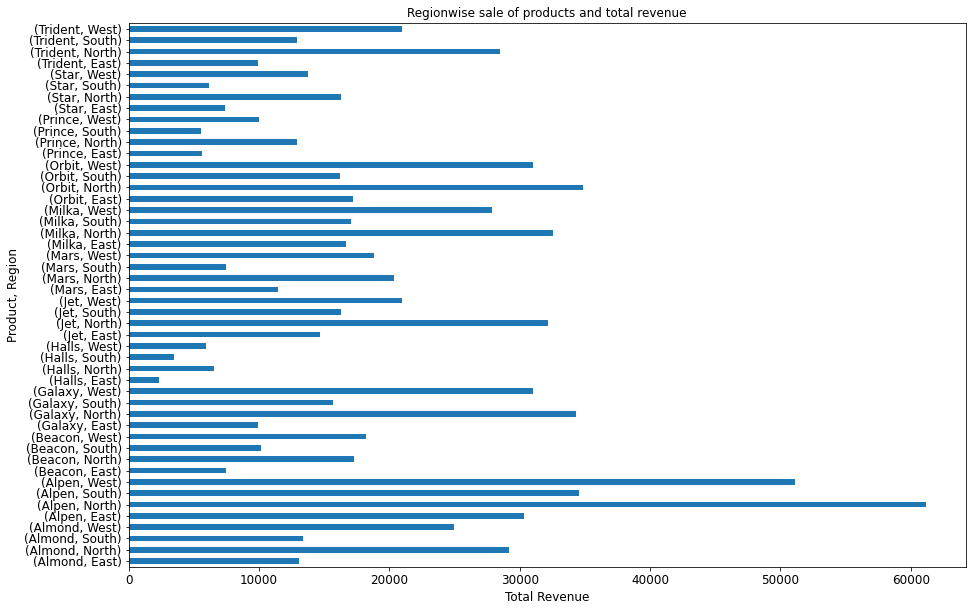

In [40]:
region_rev = sales.groupby(['product', 'region'])['revenue'].apply(lambda x: x.sum())
region_rev.plot(kind='barh', fontsize=12,figsize=(15,10) )
plt.title('Regionwise sale of products and total revenue')
plt.ylabel('Product, Region', fontsize=12)
plt.xlabel('Total Revenue', fontsize=12);

In [41]:
sales['revenue'].idxmax()  # highest value is in the 8425th row of revenue column

8425

In [42]:
sales.revenue.nlargest(3)

8425    1998.75
4846    1918.80
3529    1838.85
Name: revenue, dtype: float64

****Summary of Transactions and Revenue****

In [43]:
df_sales = pd.DataFrame(total_tr)
df_sales.columns = [ 'transactions']
df_sales.reset_index()

df_sales1 = pd.DataFrame(total_rev_rep)
df_sales1.reset_index()

sales_tr = pd.concat([df_sales,df_sales1], axis=1)
sales_tr.reset_index(inplace=True)
sales_tr[:5]

,reps,transactions,revenue
0,Aash,315,29998.47
1,Akila,109,7495.80
2,Alka,116,11464.96
3,Anahit,104,7376.05
4,Ananya,216,18510.93


****Clustering Algorithms used here are:****

* Hierarchical clustering
* KMeans

****1) Building a Hierarchical clustering model****

In [44]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from pylab import rcParams
import seaborn as sb
import sklearn.metrics as sm

****Transactions - Revenue Segmentation****

In [45]:
X_s = sales_tr.iloc[:, [1,2]].values
X_s[:3]

array([[  315.  , 29998.47],
       [  109.  ,  7495.8 ],
       [  116.  , 11464.96]])

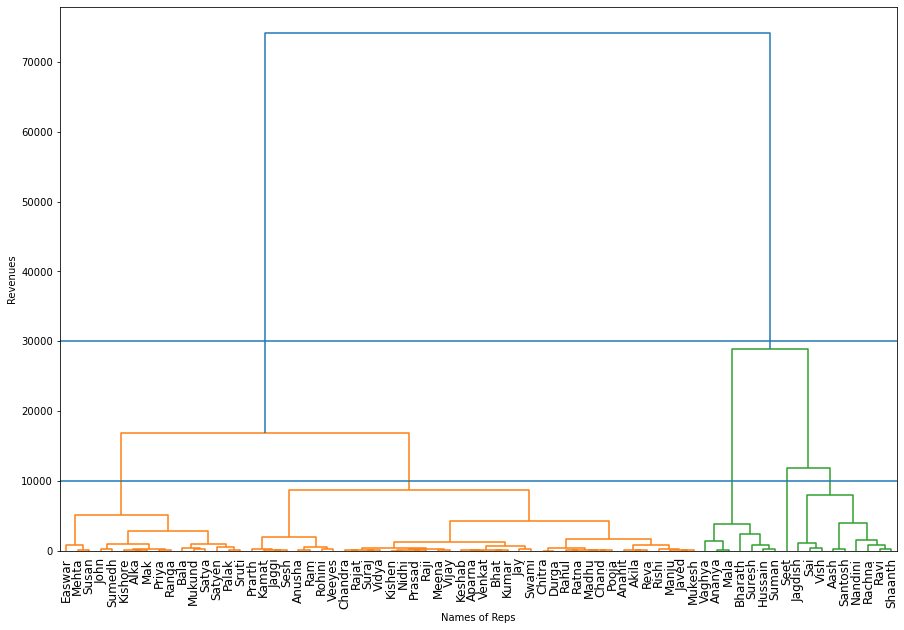

In [46]:
labelist = sales_tr['reps'].tolist()
fig = plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X_s, method = 'ward'),leaf_font_size=12,leaf_rotation=90, labels=labelist)
plt.axhline(y=10000)
plt.axhline(y=30000)
plt.xlabel('Names of Reps')
plt.ylabel('Revenues');

In [47]:
from sklearn.cluster import AgglomerativeClustering

In [48]:
import scipy.cluster.hierarchy as sch

In [49]:
hc = AgglomerativeClustering(n_clusters= 5, affinity= 'euclidean',linkage='ward')

In [50]:
y_hc = hc.fit_predict(X_s)
y_hc1 = pd.DataFrame(y_hc)

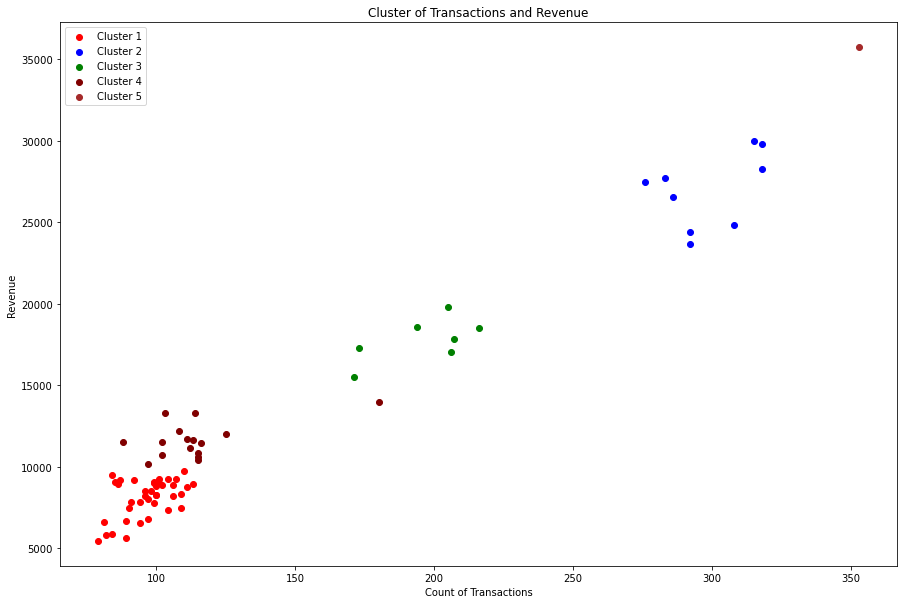

In [51]:
fig = plt.figure(figsize=(15,10))
plt.scatter(X_s[y_hc == 0,0], X_s[y_hc == 0,1],  c ='red', label='Cluster 1')
plt.scatter(X_s[y_hc == 1,0], X_s[y_hc == 1,1],  c ='blue', label='Cluster 2')
plt.scatter(X_s[y_hc == 2,0], X_s[y_hc == 2,1],  c ='green', label='Cluster 3')
plt.scatter(X_s[y_hc == 3,0], X_s[y_hc == 3,1],  c ='maroon', label='Cluster 4')
plt.scatter(X_s[y_hc == 4,0], X_s[y_hc == 4,1],  c ='brown', label='Cluster 5')
plt.title('Cluster of Transactions and Revenue')
plt.xlabel('Count of Transactions')
plt.ylabel('Revenue')
plt.legend()
plt.show();

In [52]:
# You can segregate the transaction which is over 325  and there is only one instance
sales_tr[sales_tr['transactions']>325]

,reps,transactions,revenue
56,Seet,353,35747.41


In [53]:
sales_tr[sales_tr['transactions']>250]

,reps,transactions,revenue
0,Aash,315,29998.47
16,Jagdish,292,23634.13
34,Nandini,286,26569.57
41,Rachna,318,28263.75
48,Ravi,276,27448.79
52,Sai,292,24412.79
53,Santosh,318,29801.71
56,Seet,353,35747.41
58,Shaanth,283,27692.49
71,Vish,308,24834.71


In [54]:
sales_tr[(sales_tr['transactions']>250) & (sales_tr['transactions']<350)]

,reps,transactions,revenue
0,Aash,315,29998.47
16,Jagdish,292,23634.13
34,Nandini,286,26569.57
41,Rachna,318,28263.75
48,Ravi,276,27448.79
52,Sai,292,24412.79
53,Santosh,318,29801.71
58,Shaanth,283,27692.49
71,Vish,308,24834.71


In [55]:
sales_tr[(sales_tr['transactions']>150) & (sales_tr['transactions']<250)]

,reps,transactions,revenue
4,Ananya,216,18510.93
8,Bharath,171,15478.72
14,Easwar,180,13949.79
15,Hussain,206,17006.75
28,Mala,194,18600.60
60,Suman,173,17274.12
63,Suresh,207,17823.44
66,Vaghya,205,19773.67


In [56]:
sales_tr[(sales_tr['revenue']>10000) & (sales_tr['revenue']<15000)]

,reps,transactions,revenue
2,Alka,116,11464.96
7,Bala,97,10182.97
14,Easwar,180,13949.79
20,John,108,12190.87
24,Kishore,88,11525.99
27,Mak,102,11491.63
31,Mehta,114,13325.86
33,Mukund,115,10404.84
36,Palak,115,10822.27
40,Priya,111,11710.00


In [57]:
sales_tr[(sales_tr['revenue']>20000)]

,reps,transactions,revenue
0,Aash,315,29998.47
16,Jagdish,292,23634.13
34,Nandini,286,26569.57
41,Rachna,318,28263.75
48,Ravi,276,27448.79
52,Sai,292,24412.79
53,Santosh,318,29801.71
56,Seet,353,35747.41
58,Shaanth,283,27692.49
71,Vish,308,24834.71


In [58]:
sales_tr[(sales_tr['revenue']>15000) & (sales_tr['revenue']<20000)]

,reps,transactions,revenue
4,Ananya,216,18510.93
8,Bharath,171,15478.72
15,Hussain,206,17006.75
28,Mala,194,18600.60
60,Suman,173,17274.12
63,Suresh,207,17823.44
66,Vaghya,205,19773.67


In [59]:
hc = AgglomerativeClustering(n_clusters= 8, affinity= 'euclidean',linkage='ward')

In [60]:
y_hc = hc.fit_predict(X_s)

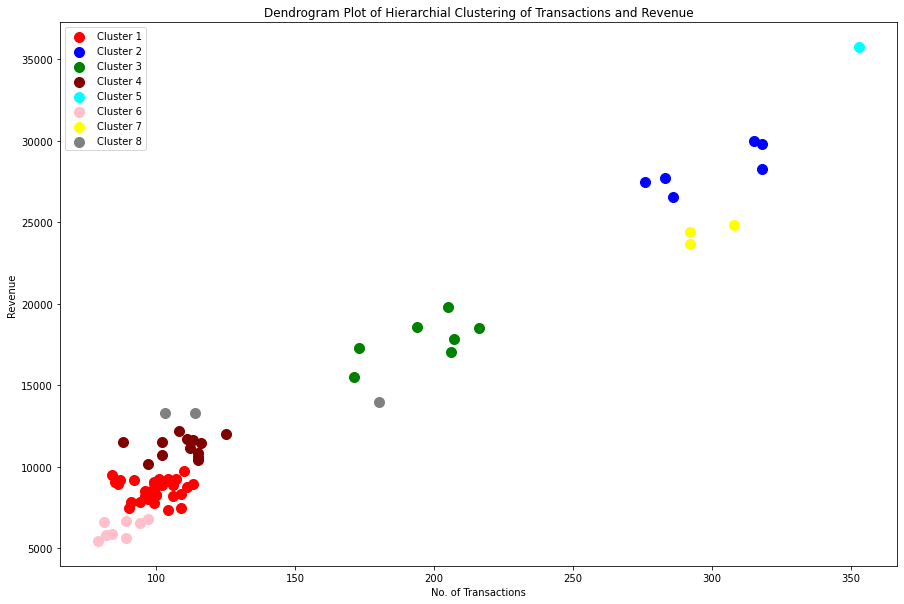

In [61]:
fig = plt.figure(figsize=(15,10))
plt.scatter(X_s[y_hc == 0,0], X_s[y_hc == 0,1], s=100, c ='red', label='Cluster 1')
plt.scatter(X_s[y_hc == 1,0], X_s[y_hc == 1,1], s=100, c ='blue', label='Cluster 2')
plt.scatter(X_s[y_hc == 2,0], X_s[y_hc == 2,1], s=100, c ='green', label='Cluster 3')
plt.scatter(X_s[y_hc == 3,0], X_s[y_hc == 3,1], s=100, c ='maroon', label='Cluster 4')
plt.scatter(X_s[y_hc == 4,0], X_s[y_hc == 4,1], s=100, c ='cyan', label='Cluster 5')
plt.scatter(X_s[y_hc == 5,0], X_s[y_hc == 5,1], s=100, c ='pink', label='Cluster 6')
plt.scatter(X_s[y_hc == 6,0], X_s[y_hc == 6,1], s=100, c ='yellow', label='Cluster 7')
plt.scatter(X_s[y_hc == 7,0], X_s[y_hc == 7,1], s=100, c ='gray', label='Cluster 8')

plt.title('Dendrogram Plot of Hierarchial Clustering of Transactions and Revenue')
plt.xlabel('No. of Transactions')
plt.ylabel('Revenue')
plt.legend()
plt.show();

In [62]:
sales_tr[(sales_tr['revenue']>32000) & (sales_tr['transactions']>300)]

,reps,transactions,revenue
56,Seet,353,35747.41


In [63]:
sales_tr[(sales_tr['revenue']>22000) & (sales_tr['transactions']<300)]

,reps,transactions,revenue
16,Jagdish,292,23634.13
34,Nandini,286,26569.57
48,Ravi,276,27448.79
52,Sai,292,24412.79
58,Shaanth,283,27692.49


****Product classification****

In [64]:
product_tr_rev[:5]

,product,qty,revenue,unit_price
0,Almond,3258,80581.91,24.733551
1,Alpen,5267,177152.07,33.634340
2,Beacon,2152,53164.41,24.704651
3,Galaxy,1150,90919.18,79.060157
4,Halls,969,18211.18,18.793787


In [65]:
X_p = product_tr_rev.iloc[:, [1,2]].values
X_p[:3]

array([[  3258.  ,  80581.91],
       [  5267.  , 177152.07],
       [  2152.  ,  53164.41]])

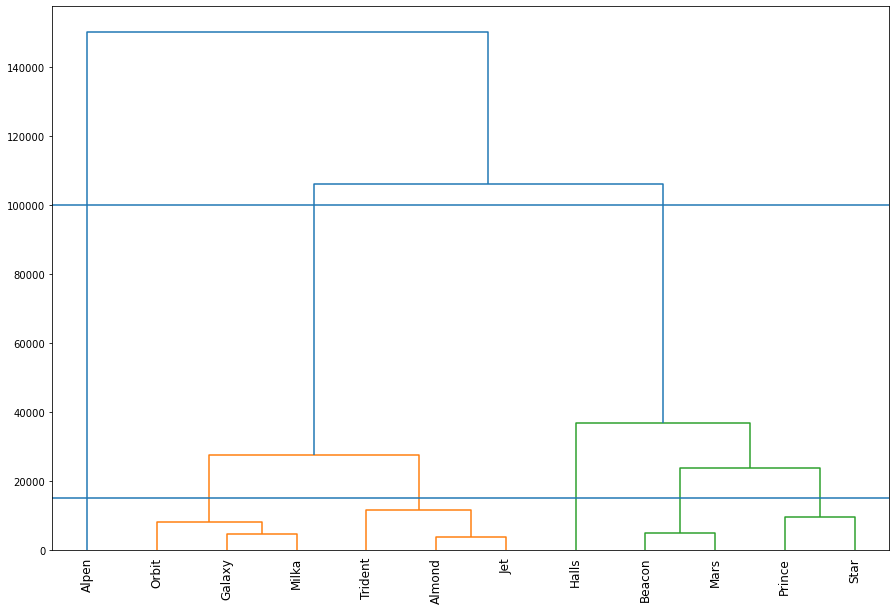

In [66]:
labelist = product_tr_rev['product'].tolist()
fig = plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X_p, method = 'ward'),leaf_font_size=12,leaf_rotation=90, labels=labelist)

plt.axhline(y=15000)
plt.axhline(y=100000)

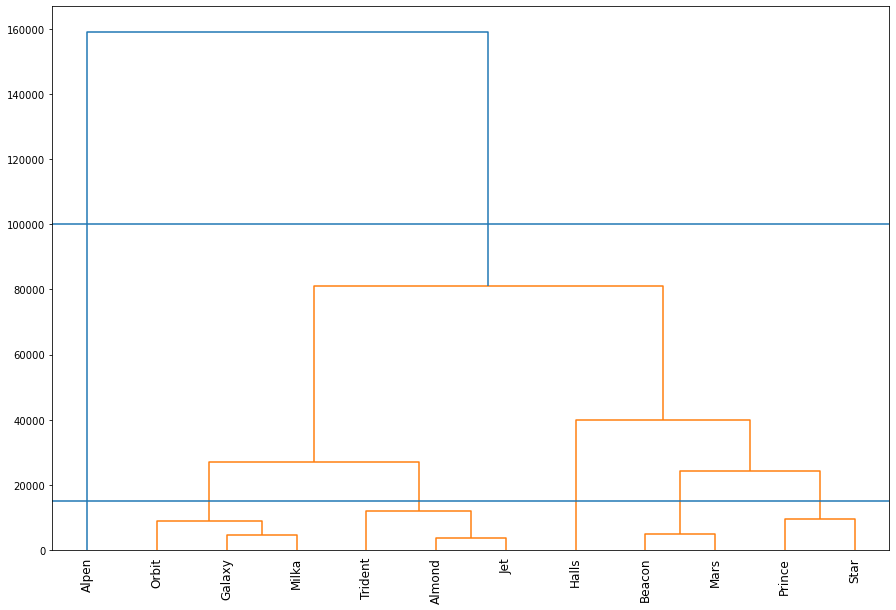

In [67]:
labelist = product_tr_rev['product'].tolist()
fig = plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X_p, method = 'complete'),leaf_font_size=12,leaf_rotation=90, labels=labelist)

plt.axhline(y=15000)
plt.axhline(y=100000)

In [68]:
hcp = AgglomerativeClustering(n_clusters= 4, affinity= 'euclidean',linkage='ward')
y_hcp = hcp.fit_predict(X_p)

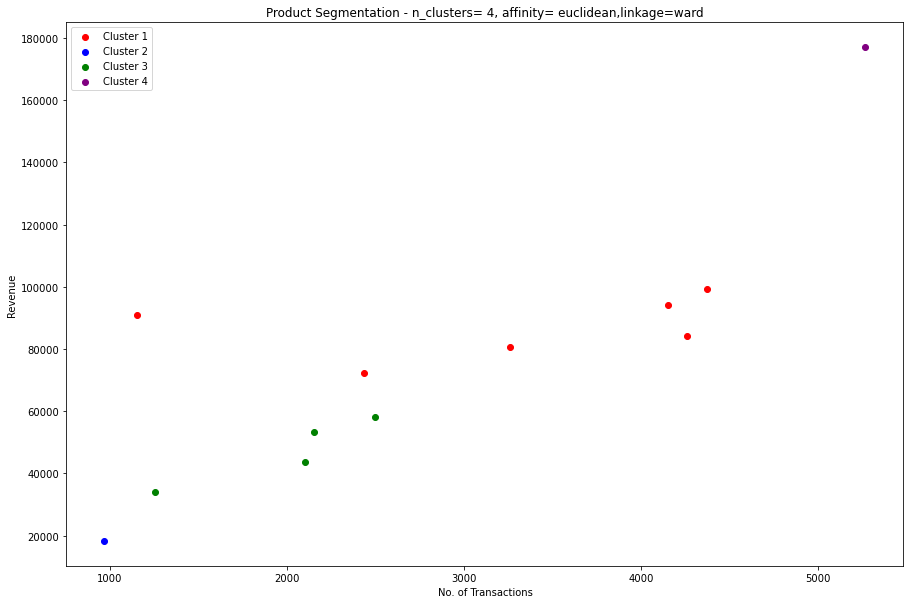

In [69]:
fig = plt.figure(figsize=(15,10))
plt.scatter(X_p[y_hcp == 0,0], X_p[y_hcp == 0,1],  c ='red', label='Cluster 1')
plt.scatter(X_p[y_hcp == 1,0], X_p[y_hcp == 1,1],  c ='blue', label='Cluster 2')
plt.scatter(X_p[y_hcp == 2,0], X_p[y_hcp == 2,1],  c ='green', label='Cluster 3')
plt.scatter(X_p[y_hcp == 3,0], X_p[y_hcp == 3,1],  c ='purple', label='Cluster 4')

plt.title('Product Segmentation - n_clusters= 4, affinity= euclidean,linkage=ward')
plt.xlabel('No. of Transactions')
plt.ylabel('Revenue')
plt.legend()
plt.show();

In [70]:
hcp1 = AgglomerativeClustering(n_clusters= 12, affinity= 'euclidean',linkage='ward')
y_hcp1 = hcp1.fit_predict(X_p)

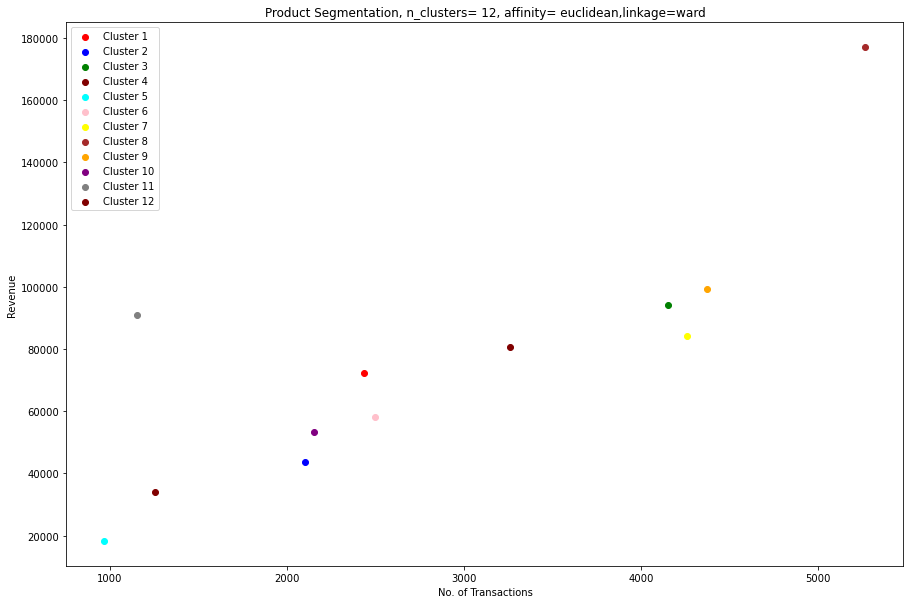

In [71]:
fig = plt.figure(figsize=(15,10))
plt.scatter(X_p[y_hcp1 == 0,0], X_p[y_hcp1 == 0,1],  c ='red', label='Cluster 1')
plt.scatter(X_p[y_hcp1 == 1,0], X_p[y_hcp1 == 1,1],  c ='blue', label='Cluster 2')
plt.scatter(X_p[y_hcp1 == 2,0], X_p[y_hcp1 == 2,1],  c ='green', label='Cluster 3')
plt.scatter(X_p[y_hcp1 == 3,0], X_p[y_hcp1 == 3,1],  c ='maroon', label='Cluster 4')
plt.scatter(X_p[y_hcp1 == 4,0], X_p[y_hcp1 == 4,1],  c ='cyan', label='Cluster 5')
plt.scatter(X_p[y_hcp1 == 5,0], X_p[y_hcp1 == 5,1],  c ='pink', label='Cluster 6')
plt.scatter(X_p[y_hcp1 == 6,0], X_p[y_hcp1 == 6,1],  c ='yellow', label='Cluster 7')
plt.scatter(X_p[y_hcp1 == 7,0], X_p[y_hcp1 == 7,1],  c ='brown', label='Cluster 8')
plt.scatter(X_p[y_hcp1 == 8,0], X_p[y_hcp1 == 8,1],  c ='orange', label='Cluster 9')
plt.scatter(X_p[y_hcp1 == 9,0], X_p[y_hcp1 == 9,1],  c ='purple', label='Cluster 10')
plt.scatter(X_p[y_hcp1 == 10,0], X_p[y_hcp1 == 10,1],  c ='gray', label='Cluster 11')
plt.scatter(X_p[y_hcp1 == 11,0], X_p[y_hcp1 == 11,1],  c ='maroon', label='Cluster 12')


plt.title('Product Segmentation, n_clusters= 12, affinity= euclidean,linkage=ward')
plt.ylabel('Revenue')
plt.xlabel('No. of Transactions')
plt.legend()
plt.show();

****Geographic Segmentation****

In [72]:
region_pr = pd.DataFrame(sales.groupby('region')['revenue'].apply(lambda x: x.sum()))

region_pr.columns = [ 'revenue']
region_pr.reset_index()

,region,revenue
0,East,146141.53
1,North,326109.54
2,South,158819.85
3,West,274631.29


In [73]:
region_pr_sale = pd.DataFrame(sales.groupby('region')['product'].apply(lambda x: x.count()))

region_pr_sale.columns = [ 'transactions']
region_pr_sale.reset_index()

,region,transactions
0,East,1703
1,North,3603
2,South,1665
3,West,3029


In [74]:
region_prd_tr = pd.concat([region_pr_sale,region_pr], axis=1)
region_prd_tr.reset_index(inplace=True)
region_prd_tr

,region,transactions,revenue
0,East,1703,146141.53
1,North,3603,326109.54
2,South,1665,158819.85
3,West,3029,274631.29


In [75]:
X_r = region_prd_tr.iloc[:, [1,2]].values
X_r

array([[  1703.  , 146141.53],
       [  3603.  , 326109.54],
       [  1665.  , 158819.85],
       [  3029.  , 274631.29]])

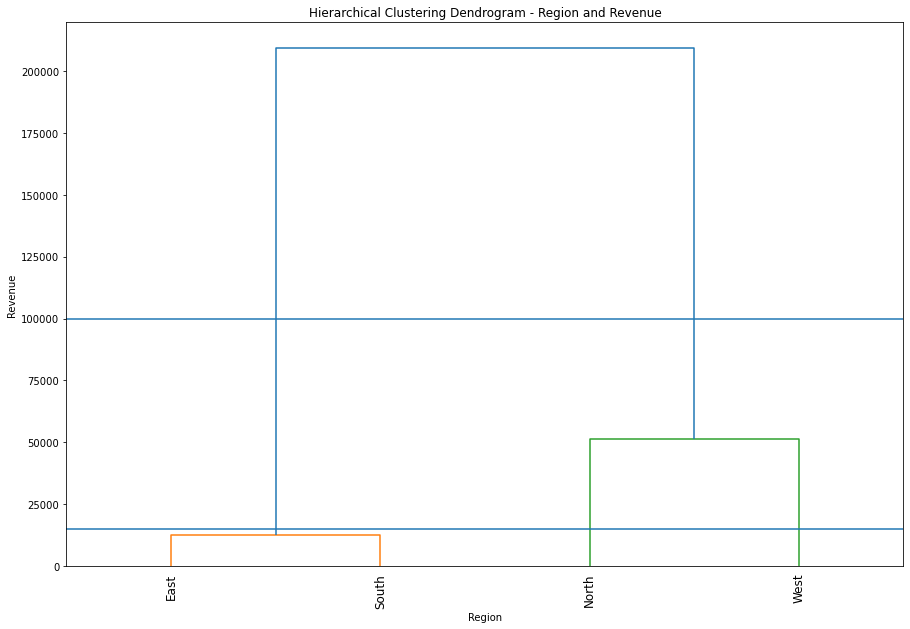

In [76]:
labelist = region_prd_tr['region'].tolist()
fig = plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X_r, method = 'ward'),leaf_font_size=12,leaf_rotation=90, labels=labelist)
#dendrogram.update({'width':10000, 'height':5000})
plt.axhline(y=15000)
plt.axhline(y=100000)
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.title('Hierarchical Clustering Dendrogram - Region and Revenue');

In [77]:
hcr = AgglomerativeClustering(n_clusters= 4, affinity= 'euclidean',linkage='ward')
y_hcr = hcr.fit_predict(X_r)

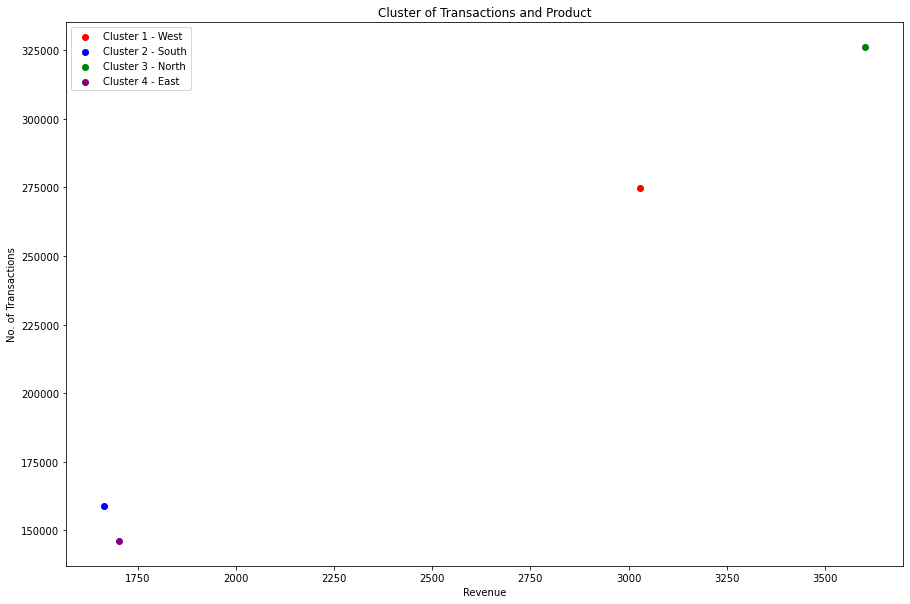

In [78]:
fig = plt.figure(figsize=(15,10))
plt.scatter(X_r[y_hcr == 0,0], X_r[y_hcr == 0,1],  c ='red', label='Cluster 1 - West')
plt.scatter(X_r[y_hcr == 1,0], X_r[y_hcr == 1,1],  c ='blue', label='Cluster 2 - South')
plt.scatter(X_r[y_hcr == 2,0], X_r[y_hcr == 2,1],  c ='green', label='Cluster 3 - North')
plt.scatter(X_r[y_hcr == 3,0], X_r[y_hcr == 3,1],  c ='purple', label='Cluster 4 - East')

plt.title('Cluster of Transactions and Product')
plt.ylabel('No. of Transactions')
plt.xlabel('Revenue')
plt.legend()
plt.show()

In [79]:
sale = sales.iloc[:, [1,2,3]]
sale[:5]

,product,qty,revenue
0,Galaxy,2,155.10
1,Jet,2,39.30
2,Beacon,3,74.25
3,Alpen,3,100.98
4,Orbit,2,44.98


In [80]:
pd.pivot_table(sales,index=["region","product"],aggfunc=sum)

qty   revenue
region product                
East   Almond    529  13091.62
       Alpen     903  30315.59
       Beacon    303   7492.95
       Galaxy    125   9906.96
       Halls     123   2310.05
       Jet       742  14643.30
       Mars      494  11485.13
       Milka     737  16702.79
       Orbit     759  17232.23
       Prince    208   5636.46
       Star      355   7366.55
       Trident   336   9957.90
North  Almond   1181  29196.74
       Alpen    1818  61158.69
       Beacon    703  17321.42
       Galaxy    434  34346.80
       Halls     346   6507.36
       Jet      1630  32173.26
       Mars      874  20351.72
       Milka    1434  32580.58
       Orbit    1536  34820.15
       Prince    474  12887.19
       Star      785  16305.08
       Trident   959  28460.55
South  Almond    541  13364.23
       Alpen    1027  34524.45
       Beacon    411  10178.19
       Galaxy    198  15667.34
       Halls     185   3474.92
       Jet       824  16254.69
       Mars      322   7485.44
       Milka     752  17068.95
       Orbit     713  16175.54
       Prince    203   5516.84
       Star      298   6190.96
       Trident   434  12918.30
West   Almond   1007  24929.32
       Alpen    1519  51153.34
       Beacon    735  18171.85
       Galaxy    393  30998.08
       Halls     315   5918.85
       Jet      1066  21006.31
       Mars      808  18787.31
       Milka    1230  27897.08
       Orbit    1367  31056.33
       Prince    368   9984.97
       Star      663  13775.40
       Trident   707  20952.45

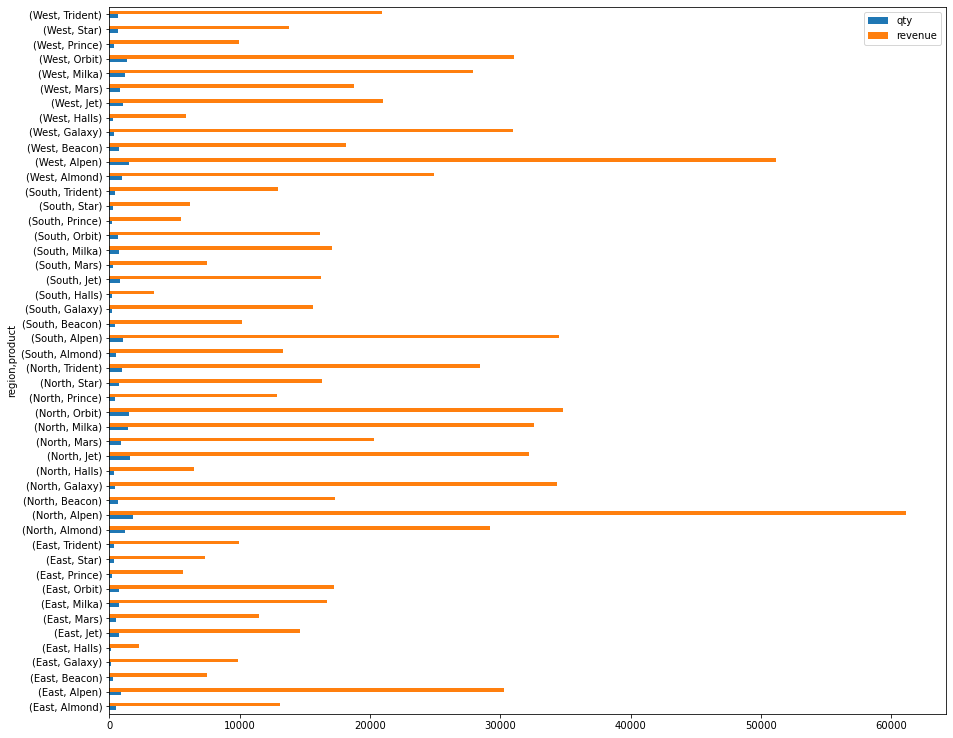

In [81]:
pd.pivot_table(sales,index=["region","product"],aggfunc=sum).plot(kind='barh',figsize=(15,13));

****Make a pie chart****

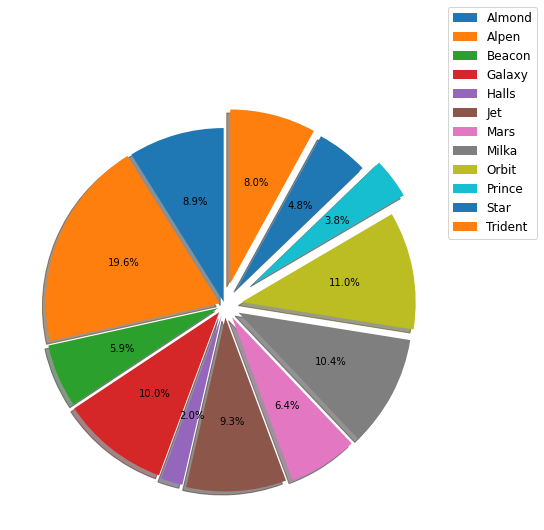

In [82]:
productsales.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(9,8))
explode = (0.02,0.03,0.04,0.05,0.06,0.07,0.08, 0.09, 0.10, .21,.12,.13)
ax.pie(productsales, labels = None, autopct='%1.1f%%', startangle=90, shadow = True, explode = explode)
ax.legend(bbox_to_anchor=(1,1.2),fontsize='large', labels=productsales.index);

In [83]:
pd.pivot_table(sales,index=["region","reps","product"])[:12]

qty     revenue
region reps product                      
East   Aash Almond   2.756757   68.514054
            Alpen    3.321429  111.031250
            Beacon   3.000000   74.422500
            Galaxy   2.727273  216.190909
            Halls    2.428571   45.587143
            Jet      3.222222   63.590667
            Mars     7.521739  174.463478
            Milka    3.628571   82.189714
            Orbit    3.678571   82.987857
            Prince   6.307692  170.903077
            Star     2.384615   49.544231
            Trident  3.333333   98.516667

****KDE - Visualizing the distribution of a dataset****

The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. 
The KDE plots encodes the density of observations on one axis with height along the other axis.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='qty', ylabel='revenue'>

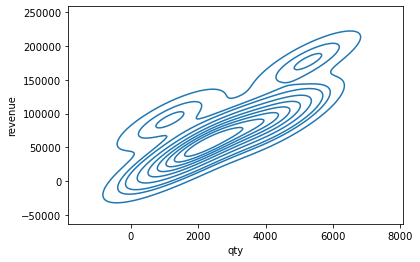

In [84]:
sns.kdeplot(product_tr_rev.qty, product_tr_rev.revenue)

In [85]:
product_tr_rev[(product_tr_rev['qty']>5000) & (product_tr_rev['revenue']>150000)]

,product,qty,revenue,unit_price
1,Alpen,5267,177152.07,33.63434


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='qty', ylabel='unit_price'>

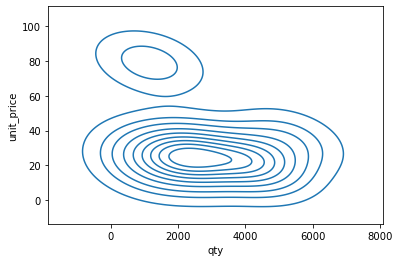

In [86]:
sns.kdeplot(product_tr_rev.qty, product_tr_rev.unit_price)

In [87]:
product_tr_rev[(product_tr_rev['unit_price']>50)]  

,product,qty,revenue,unit_price
3,Galaxy,1150,90919.18,79.060157


In [88]:
df_n = sales[sales['region'] == 'North']   
prd_north = df_n.groupby('product')['qty','revenue'].apply(lambda x: x.sum())
prd_north

<ipython-input-88-c644833a3b1f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prd_north = df_n.groupby('product')['qty','revenue'].apply(lambda x: x.sum())


,qty,revenue
product,,
Almond,1181.0,29196.74
Alpen,1818.0,61158.69
Beacon,703.0,17321.42
Galaxy,434.0,34346.80
Halls,346.0,6507.36
Jet,1630.0,32173.26
Mars,874.0,20351.72
Milka,1434.0,32580.58
Orbit,1536.0,34820.15


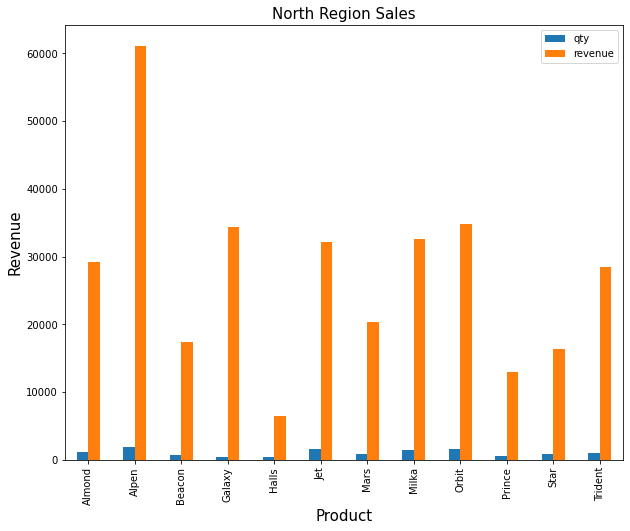

In [89]:
prd_north.plot(kind="bar", figsize=(10,8))
plt.title('North Region Sales', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.xlabel('Product', fontsize = 15);

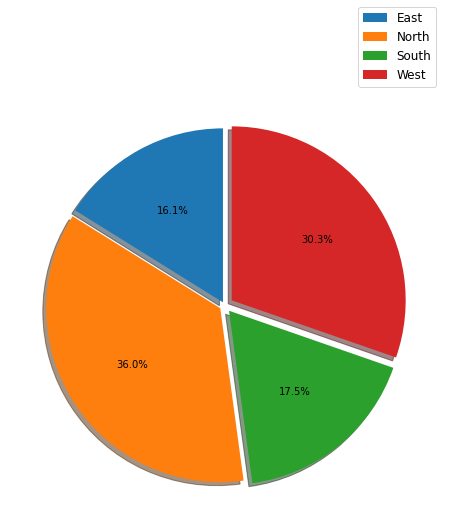

In [90]:
total_rev.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(9,8))
explode = (0.02,0.03,0.04,0.05)
ax.pie(total_rev, labels = None, autopct='%1.1f%%', startangle=90, shadow = True, explode = explode)
ax.legend(bbox_to_anchor=(1,1.2),fontsize='large', labels=total_rev.index);

You will observe from the figure that East contributes to 16% of revenue, North - 36%, South - 17.5%, & West - 30.3%

**** 2) Building a KMeans Clustering Model****

In [91]:
sales[:5]

,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,West
1,Vijay,Jet,2,39.30,North
2,Mala,Beacon,3,74.25,West
3,Suman,Alpen,3,100.98,North
4,Rachna,Orbit,2,44.98,North


****Encoding the Data****


In [92]:
from sklearn.preprocessing import LabelEncoder # encoding all the text categorical data into numerical data
le = LabelEncoder()

In [93]:
sales['region'] = le.fit_transform(sales['region'])
sales.head()

,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,3
1,Vijay,Jet,2,39.30,1
2,Mala,Beacon,3,74.25,3
3,Suman,Alpen,3,100.98,1
4,Rachna,Orbit,2,44.98,1


In [94]:
le.classes_ # view the encoded classes

array(['East', 'North', 'South', 'West'], dtype=object)

In [95]:
cols = ['qty', 'revenue']
df = sale[cols]
X = df.iloc[:,[0,1]].values
X[:3]

array([[  2.  , 155.1 ],
       [  2.  ,  39.3 ],
       [  3.  ,  74.25]])

In [96]:
y = sales.iloc[:,4].values
y

array([3, 1, 3, ..., 3, 1, 3])

****number_of_clusters=4****

In [97]:
from sklearn.cluster import KMeans

number_of_clusters=4
km = KMeans(n_clusters=number_of_clusters)

km.fit(X)


KMeans(n_clusters=4)

In [98]:
print(km.labels_)
print(km.cluster_centers_)

[0 0 0 ... 0 0 0]
[[   2.18508685   56.00086735]
 [  20.33333333  555.98782051]
 [  10.6205036   287.48383094]
 [  19.2        1522.274     ]]


In [99]:
# create a array for label colors
colors = ['red', 'blue', 'green','brown']
# assign color to each cluster
pred_colors = [colors[label] for label in km.labels_]

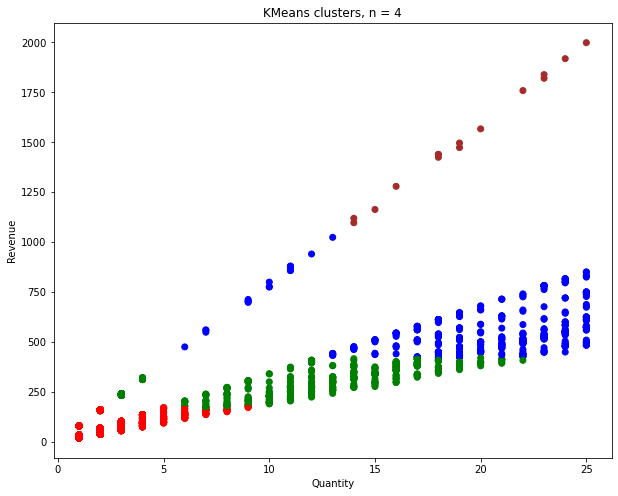

In [100]:
# plot the KMeans clusters
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=pred_colors)
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('KMeans clusters, n = 4');

In [101]:
df[(df['qty']>12) & (df['revenue']>1000)]

,qty,revenue
1353,22,1758.90
3529,23,1838.85
3635,18,1439.10
3910,14,1119.30
4146,13,1023.76
4846,24,1918.80
5667,16,1279.20
5815,15,1163.27
5871,18,1424.71
5927,20,1567.02


In [102]:
sales.loc[9590]

reps         Vijay
product     Galaxy
qty             23
revenue    1820.46
region           1
Name: 9590, dtype: object

****number_of_clusters=6****

In [103]:
cols1 = ['region', 'revenue']
df1 = sales[cols1]
X1 = df1.iloc[:,[0,1]].values
number_of_clusters=6
km = KMeans(n_clusters=number_of_clusters)
km.fit(X1)


KMeans(n_clusters=6)

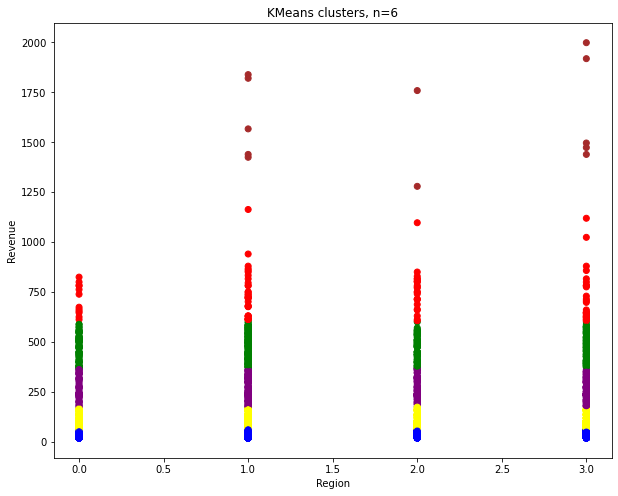

In [104]:
colors = ['blue', 'green','purple','brown', 'yellow','red']
pred_colors = [colors[label] for label in km.labels_]

plt.figure(figsize=(10,8))
plt.scatter(X1[:, 0], X1[:, 1], c=pred_colors)
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.title('KMeans clusters, n=6');

In [105]:
df1[(df1['region']==1) & (df1['revenue']>1500)]

,region,revenue
3529,1,1838.85
5927,1,1567.02
9590,1,1820.46


In [106]:
cols2 = ['region', 'qty']
df2 = sales[cols2]
X2 = df2.iloc[:,[0,1]].values

In [107]:
number_of_clusters=6
km = KMeans(n_clusters=number_of_clusters)
km.fit(X2)

KMeans(n_clusters=6)

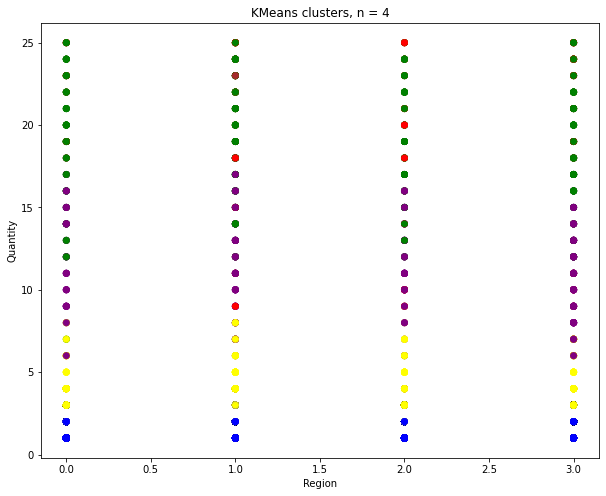

In [108]:
plt.figure(figsize=(10,8))
plt.scatter(X2[:, 0], X2[:, 1], c=pred_colors)
plt.xlabel('Region')
plt.ylabel('Quantity')
plt.title('KMeans clusters, n = 4');

****Plot of Count of Transactions and Revenue****

In [109]:
sales_tr[:5]

,reps,transactions,revenue
0,Aash,315,29998.47
1,Akila,109,7495.80
2,Alka,116,11464.96
3,Anahit,104,7376.05
4,Ananya,216,18510.93


In [110]:
X3 = sales_tr.iloc[:,[1,2]].values

In [111]:
number_of_clusters=6
km = KMeans(n_clusters=number_of_clusters)
km.fit(X3)

KMeans(n_clusters=6)

In [112]:
sales_tr['reps'] = le.fit_transform(sales_tr['reps'])
sales_tr.head()

,reps,transactions,revenue
0,0,315,29998.47
1,1,109,7495.80
2,2,116,11464.96
3,3,104,7376.05
4,4,216,18510.93


In [113]:
le.classes_

array(['Aash', 'Akila', 'Alka', 'Anahit', 'Ananya', 'Anusha', 'Aparna',
       'Bala', 'Bharath', 'Bhat', 'Chand', 'Chandra', 'Chitra', 'Durga',
       'Easwar', 'Hussain', 'Jagdish', 'Jaggi', 'Javed', 'Jay', 'John',
       'Kamat', 'Keshab', 'Kishen', 'Kishore', 'Kumar', 'Madhu', 'Mak',
       'Mala', 'Manju', 'Meena', 'Mehta', 'Mukesh', 'Mukund', 'Nandini',
       'Nidhi', 'Palak', 'Pooja', 'Prarth', 'Prasad', 'Priya', 'Rachna',
       'Rahul', 'Rajat', 'Raji', 'Ram', 'Ranga', 'Ratna', 'Ravi', 'Reva',
       'Rishi', 'Rohini', 'Sai', 'Santosh', 'Satya', 'Satyen', 'Seet',
       'Sesh', 'Shaanth', 'Sruti', 'Suman', 'Sumedh', 'Suraj', 'Suresh',
       'Susan', 'Swami', 'Vaghya', 'Veeyes', 'Venkat', 'Vidya', 'Vijay',
       'Vish'], dtype=object)

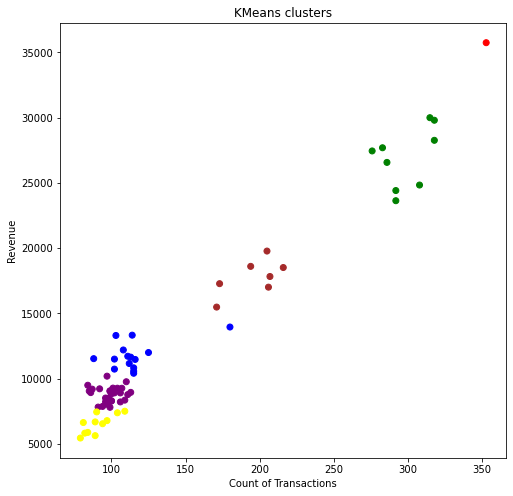

In [114]:
colors = ['blue', 'green','purple','brown', 'yellow','red']
pred_colors = [colors[label] for label in km.labels_]
plt.figure(figsize=(8, 8))
plt.scatter(X3[:, 0], X3[:, 1], c=pred_colors)
plt.title('KMeans clusters')
plt.xlabel('Count of Transactions')
plt.ylabel('Revenue');

In [115]:
sales_tr[(sales_tr['transactions']>350) & (sales_tr['revenue']>31500)]

,reps,transactions,revenue
56,56,353,35747.41


In [116]:
X4 = sales_tr.iloc[:,[0,2]].values
number_of_clusters=6
km = KMeans(n_clusters=number_of_clusters)
km.fit(X4)

KMeans(n_clusters=6)

Text(0, 0.5, 'Total Revenue')

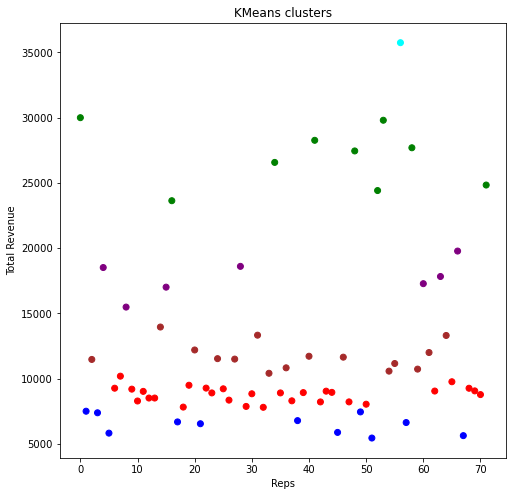

In [117]:
colors = ['blue', 'green','purple','brown', 'cyan','red']
pred_colors = [colors[label] for label in km.labels_]
plt.figure(figsize=(8, 8))
plt.scatter(X4[:, 0], X4[:, 1], c=pred_colors)
plt.title('KMeans clusters')
plt.xlabel('Reps')
plt.ylabel('Total Revenue')

In [118]:
sales_tr[(sales_tr['reps']<10) & (sales_tr['revenue']>25000)]

,reps,transactions,revenue
0,0,315,29998.47


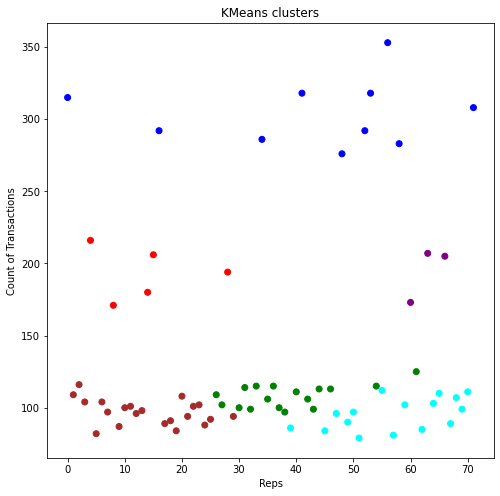

In [119]:
X5 = sales_tr.iloc[:,[0,1]].values
number_of_clusters=6
km = KMeans(n_clusters=number_of_clusters)
km.fit(X5)
colors = ['blue', 'green','purple','brown', 'cyan','red']
pred_colors = [colors[label] for label in km.labels_]
plt.figure(figsize=(8, 8))
plt.scatter(X5[:, 0], X5[:, 1], c=pred_colors)
plt.title('KMeans clusters')
plt.xlabel('Reps')
plt.ylabel('Count of Transactions');

Text(0.5, 0, 'Count of Transactions')

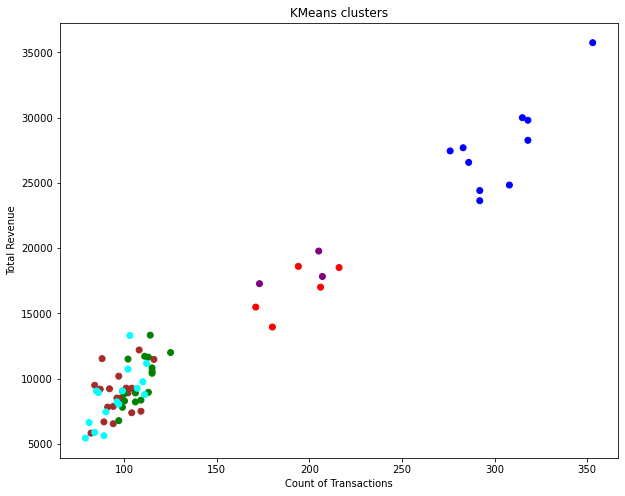

In [120]:
X6 = sales_tr.iloc[:,[1,2]].values
number_of_clusters=6
km = KMeans(n_clusters=number_of_clusters)
km.fit(X6)
plt.figure(figsize=(10, 8))
plt.scatter(X6[:, 0], X6[:, 1], c=pred_colors)
plt.title('KMeans clusters')
plt.ylabel('Total Revenue')
plt.xlabel('Count of Transactions')

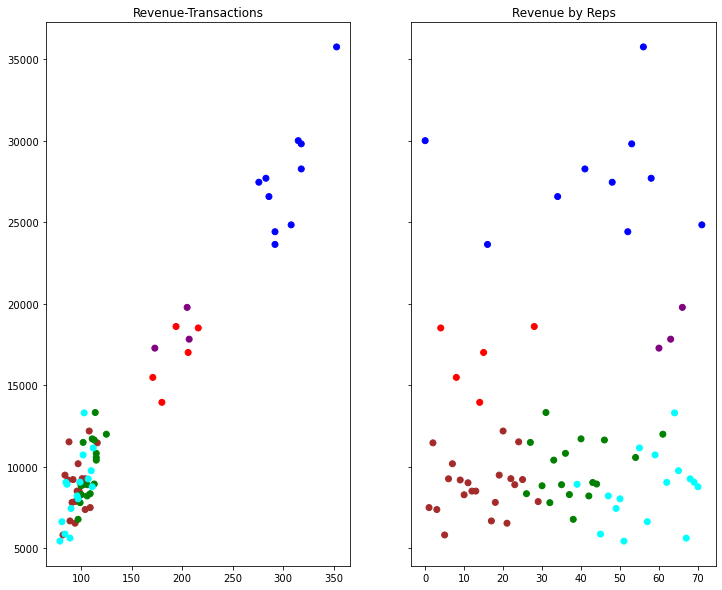

In [121]:
# Two subplots
f, axarr = plt.subplots(1, 2, sharey=True, figsize=(12,10))

axarr[0].scatter(X6[:, 0], X6[:, 1], c=pred_colors)
axarr[0].set_title('Revenue-Transactions')
#axarr[0].label('Total Revenue')
#axarr[0].label('Count of Transactions')
axarr[1].scatter(X4[:, 0], X4[:, 1], c=pred_colors)
#axarr[1].label('Reps')

axarr[1].set_title('Revenue by Reps');


In [122]:
sales_tr[(sales_tr['transactions']<150) & (sales_tr['revenue']>10000)]

,reps,transactions,revenue
2,2,116,11464.96
7,7,97,10182.97
20,20,108,12190.87
24,24,88,11525.99
27,27,102,11491.63
31,31,114,13325.86
33,33,115,10404.84
36,36,115,10822.27
40,40,111,11710.00
46,46,113,11639.45


****Simple Linear Regression****

****Questions:****

* Is there a relationship between transactions and revenue? 
* How strong is that relationship?
* If we increase our transaction count by 50, will there be an increase in revenue? 
* Given a increase in transaction in a particular market, Can the revenue be predicted?
* How strong is that relationship?


In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
sales_tr.corr()

,reps,transactions,revenue
reps,1.000000,0.129877,0.149195
transactions,0.129877,1.000000,0.973837
revenue,0.149195,0.973837,1.000000


In [125]:
X = sales_tr['transactions'].tolist()
y = sales_tr['revenue'].tolist()

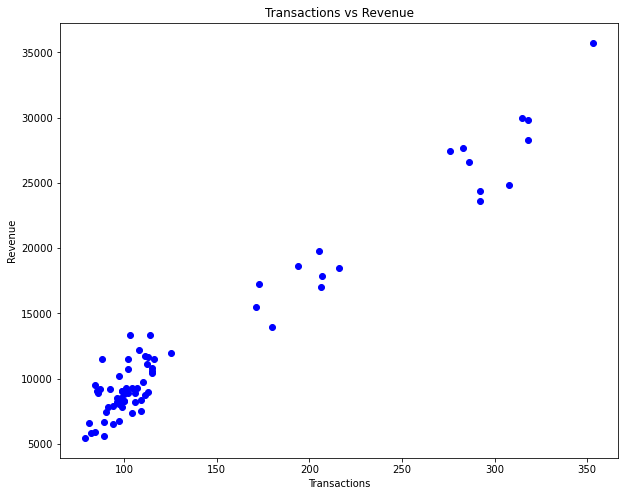

In [126]:
# create a plot to view the correlation between X and y
plt.figure(1, figsize=(10, 8))
plt.title('Transactions vs Revenue')
plt.xlabel('Transactions')
plt.ylabel('Revenue')
plt.scatter(X[:10000], y[:10000], color='blue')
plt.show()

In [127]:
feature_cols = ['transactions']
X = sales_tr[feature_cols]
y = sales_tr.revenue

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)
list(zip(feature_cols, lm2.coef_))

-220.34803565261427
[92.15672686]


[('transactions', 92.15672685669881)]

****Interpreting Model Coefficients****

A "unit" increase in Transaction is associated with a 92.15 rupee increase in Revenue.

Using the Model for Prediction
Let's say that there was a new market where the transaction was 50 units.

What would we predict the revenue in that market?
 
y=-220.348+92.1567×50

****Using the Model for Prediction****

In [128]:
220.348 + 92.1567*50

4828.183

Thus, we would predict Revenue of 4,828.18 rupees in that market.

****Plotting the Least Squares Line****

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


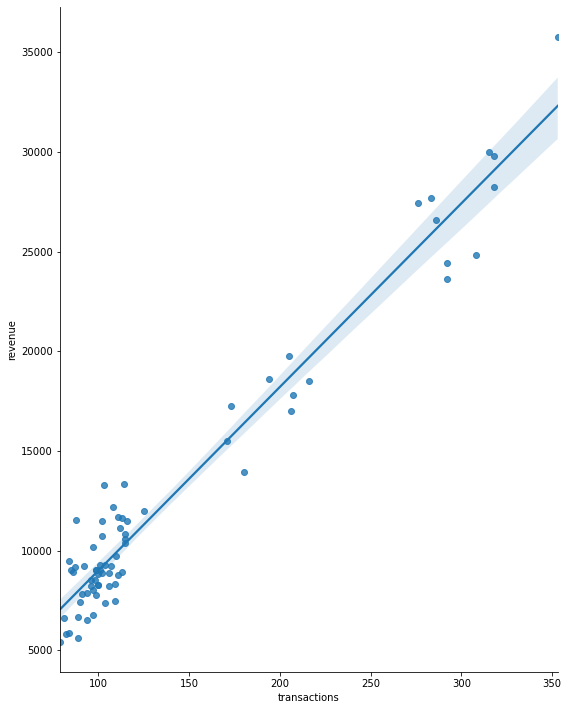

In [129]:
sns.pairplot(sales_tr, x_vars=['transactions'], y_vars='revenue', size=10, aspect=0.8, kind='reg')

In [130]:
# print the R-squared value for the model
lm2.score(X, y)

0.9483580118550978

What are a few key things we learn from this output?

p-values are small.
There is association between transactions and revenue
This model has a R-squared value of 0.948.
This model provides a good fit

In [131]:
from sklearn import metrics
# Predict
y_pred = lm2.predict(X)
y_pred[:2]


array([28809.02092421,  9824.73519173])

****Visualize data****

In [132]:
import seaborn as sns

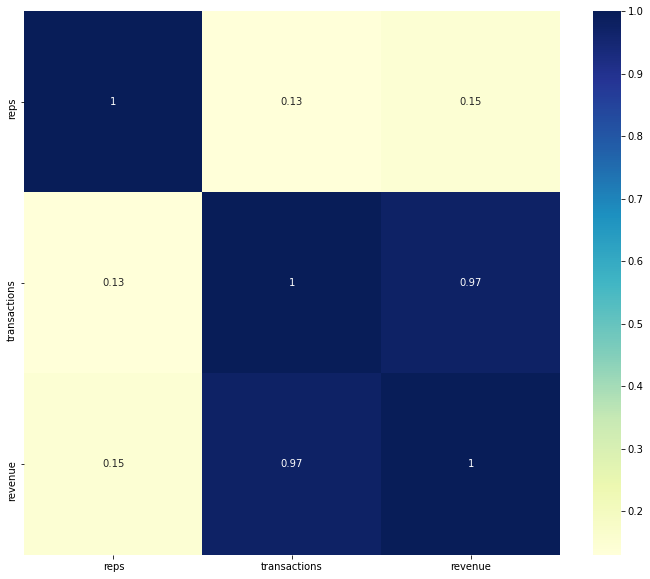

In [133]:
plt.figure(figsize=(12,10))
sns.heatmap(sales_tr.corr(),annot = True,cmap="YlGnBu");

In [134]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(sales_tr, figsize=(12,8), alpha=0.3);

ModuleNotFoundError: No module named 'pandas.tools'

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


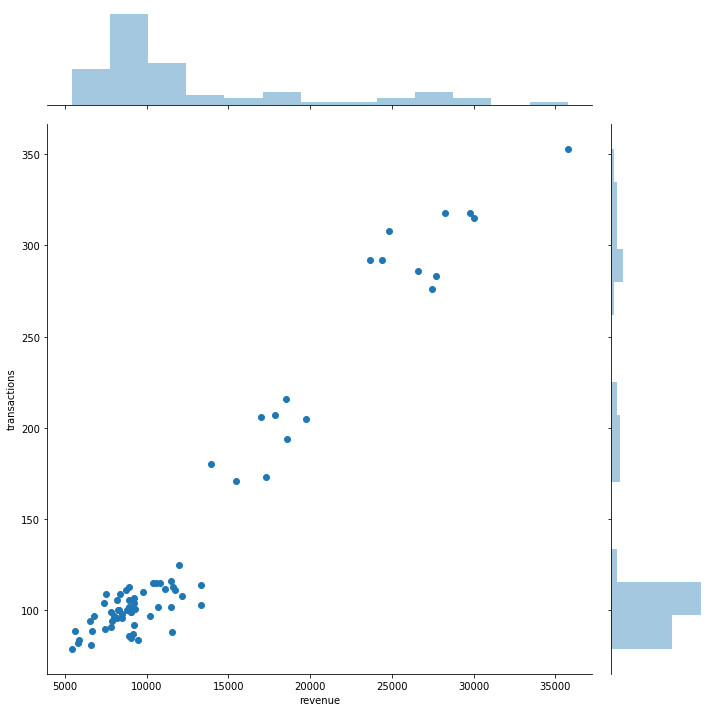

In [ ]:
sns.jointplot('revenue', 'transactions', data=sales_tr, size = 10);

/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


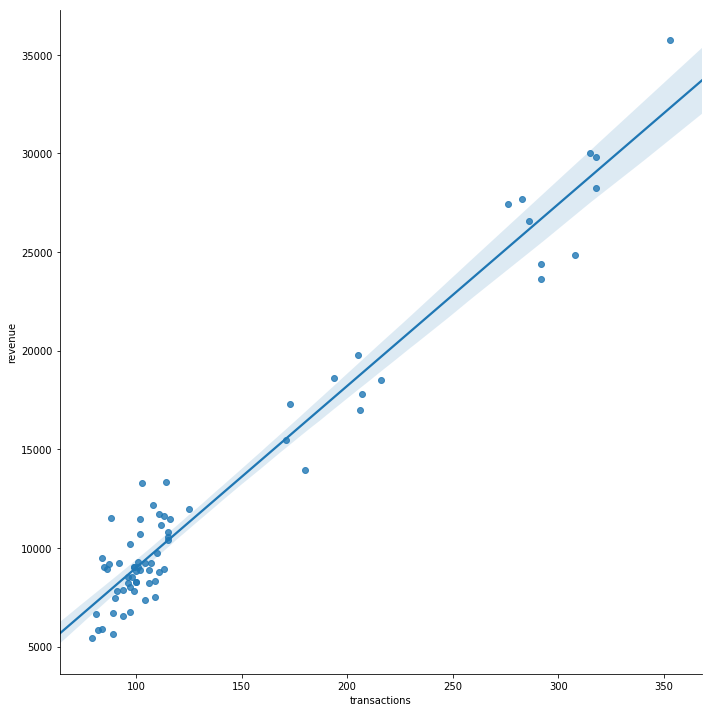

In [ ]:
sns.lmplot('transactions', 'revenue',data=sales_tr, size = 10);

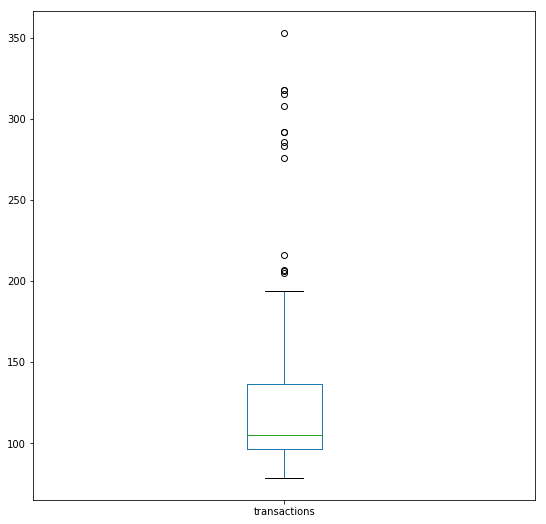

In [ ]:
sales_tr["transactions"].plot(kind="box",figsize=(9,9))

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


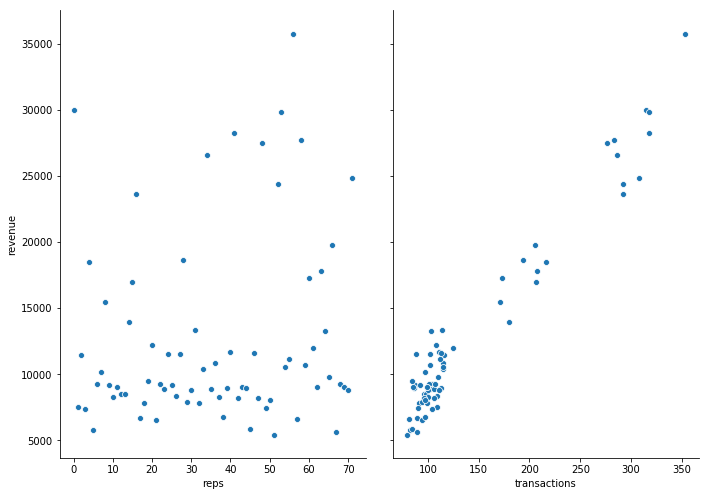

In [ ]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(sales_tr, x_vars=['reps','transactions'], y_vars='revenue', size=7, aspect=0.7);

****Handling Categorical Features with More than Two Categories****

We will create one of our features as categorical.
Let's create a new feature called 'size', and randomly assign observations to be small or large:

In [ ]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly 0.4 are True
nums = np.random.rand(len(sales))
mask_large = nums > 0.4

# initially set Size to small, then change 60% to be large
sales['size'] = 'small'

# sales.loc is a purely label-location based indexer for selection by label
sales.loc[mask_large, 'size'] = 'large'
sales.head()

,reps,product,qty,revenue,region,size
0,Chitra,Galaxy,2,155.10,3,large
1,Vijay,Jet,2,39.30,1,small
2,Mala,Beacon,3,74.25,3,small
3,Suman,Alpen,3,100.98,1,small
4,Rachna,Orbit,2,44.98,1,large


In [ ]:
sales['size'].value_counts()

large    6002
small    3998
Name: size, dtype: int64

In [ ]:
# create a new Series called Size_large
sales['large_size'] = le.fit_transform(sales['size'])
sales.head()

,reps,product,qty,revenue,region,size,large_size
0,Chitra,Galaxy,2,155.10,3,large,0
1,Vijay,Jet,2,39.30,1,small,1
2,Mala,Beacon,3,74.25,3,small,1
3,Suman,Alpen,3,100.98,1,small,1
4,Rachna,Orbit,2,44.98,1,large,0


In [ ]:
# create X and y
feature_cols = ['qty', 'large_size']
X = sales[feature_cols]
y = sales.revenue

# instantiate
lm = LinearRegression()
# fit
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))

[('qty', 26.510155558712537), ('large_size', -0.47359030679865427)]

****Interpreting the large_size coefficient****

For a given quantity, a large size is associated with a decrease in revenue of 0.47 rupees (as compared to a small size, which is called the baseline level).

What if we had reversed the 1/0 coding and created the feature small_size' instead?
The coefficient would be the same, except that it would be negative instead of positive
As such, your choice of category for the baseline does not matter, all that changes is your interpretation of the coefficient.

Let's create a new feature called Area, and randomly assign observations to be rural, suburban, or urban.

In [ ]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly some percentage of observations to each group (20% to rural, 30% to suburban, 50% to urban)
nums = np.random.rand(len(sales))
mask_suburban = (nums > 0.2) & (nums < 0.5)
mask_urban = nums > 0.5
sales['Area'] = 'rural'
# sales.loc is a purely label-location based indexer for selection by label
sales.loc[mask_suburban, 'Area'] = 'suburban'
sales.loc[mask_urban, 'Area'] = 'urban'
sales.head()

,reps,product,qty,revenue,region,size,large_size,Area
0,Chitra,Galaxy,2,155.10,3,large,0,rural
1,Vijay,Jet,2,39.30,1,small,1,urban
2,Mala,Beacon,3,74.25,3,small,1,suburban
3,Suman,Alpen,3,100.98,1,small,1,urban
4,Rachna,Orbit,2,44.98,1,large,0,suburban


In [ ]:
sales.Area.value_counts()

urban       5003
suburban    3096
rural       1901
Name: Area, dtype: int64

In [ ]:
# create three dummy variables using get_dummies
pd.get_dummies(sales.Area, prefix='Area').head()

,Area_rural,Area_suburban,Area_urban
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [ ]:
area_dummies = pd.get_dummies(sales.Area, prefix='Area')
area_dummies.head()

,Area_rural,Area_suburban,Area_urban
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [ ]:
sales_df = pd.concat([sales, area_dummies], axis=1)
sales_df.head()

,reps,product,qty,revenue,region,size,large_size,Area,Area_rural,Area_suburban,Area_urban
0,Chitra,Galaxy,2,155.10,3,large,0,rural,1,0,0
1,Vijay,Jet,2,39.30,1,small,1,urban,0,0,1
2,Mala,Beacon,3,74.25,3,small,1,suburban,0,1,0
3,Suman,Alpen,3,100.98,1,small,1,urban,0,0,1
4,Rachna,Orbit,2,44.98,1,large,0,suburban,0,1,0


In [ ]:
# create X and y
feature_cols = ['qty', 'large_size',  'Area_suburban', 'Area_urban']
X = sales_df[feature_cols]
y = sales_df.revenue

# instantiate and fit
lm3 = LinearRegression()
lm3.fit(X, y)

# print the coefficients
list(zip(feature_cols, lm3.coef_))

[('qty', 26.506365104475673),
 ('large_size', -0.4570066213445389),
 ('Area_suburban', -0.5909616082201052),
 ('Area_urban', -2.702447453573667)]

****How do we interpret the coefficients?****

An increase in 1 unit quantity is associated with 26.5 rupee increase in revenue.

Holding all other variables fixed, a suburban area is associated with an decrease in revenue of 0.59 rupeess (as compared to the baseline level, which is rural).
An urban area is associated with a decrease in revenue of 2.70 rupees (as compared to rural).